In [5]:
import numpy as np
import tensorflow as tf
import tensorlayer as tl

In [3]:
sess = tf.Session()
new_saver = tf.train.import_meta_graph('../checkpoint/ppo/model.ckpt-567036.meta')
new_saver.restore(sess, tf.train.latest_checkpoint('../checkpoint/ppo'))

INFO:tensorflow:Restoring parameters from ../checkpoint/ppo/model.ckpt-567036


In [27]:
variables = tf.trainable_variables()
placeholders = [ op for op in sess.graph.get_operations() if op.type == "Placeholder"]

In [28]:
writer = tf.summary.FileWriter("output", sess.graph)
sess.run(variables[-1])
writer.close()

In [29]:
print(variables)
print(placeholders)

[<tf.Variable 'ppo/actions-and-internals/layered-network/apply/conv2d0/apply/W:0' shape=(8, 8, 4, 32) dtype=float32_ref>, <tf.Variable 'ppo/actions-and-internals/layered-network/apply/conv2d0/apply/b:0' shape=(32,) dtype=float32_ref>, <tf.Variable 'ppo/actions-and-internals/layered-network/apply/conv2d1/apply/W:0' shape=(4, 4, 32, 64) dtype=float32_ref>, <tf.Variable 'ppo/actions-and-internals/layered-network/apply/conv2d1/apply/b:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'ppo/actions-and-internals/layered-network/apply/conv2d2/apply/W:0' shape=(3, 3, 64, 64) dtype=float32_ref>, <tf.Variable 'ppo/actions-and-internals/layered-network/apply/conv2d2/apply/b:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'ppo/actions-and-internals/layered-network/apply/dense0/apply/linear/apply/W:0' shape=(10816, 256) dtype=float32_ref>, <tf.Variable 'ppo/actions-and-internals/layered-network/apply/dense0/apply/linear/apply/b:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'ppo/actions-and-interna

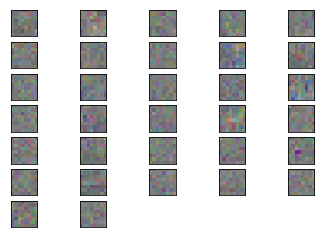

In [23]:
conv2d1 = variables[0]

filters1 = (conv2d1.eval(session=sess)[:, :, :-1, :] + 1) / 2

tl.visualize.CNN2d(
    filters1,
    saveable=True,
    name='cnn1_sh',
    fig_idx=0,
)